**Date :** Created on Tuesday January 12 2021  

**Group 8 - Innovation**

**get_keywords_from_queries_v0** 

**@author :** Katia Belaid. 

**Description :** This notebook implements a method for collecting new keywords taking into consideration the list of queries using wordclouds.

# Part 1 : Install / Download / Import Librairy

## Install librairy

In [1]:
#!pip install gensim
#!pip install wordcloud
#(Optional) !pip install fasttext

## Import librairy

### - Usefull librairy :

In [2]:
import pickle
from google.colab import drive

### - Text librairy :

In [3]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### - Machine-Learning librairy :

In [4]:
import matplotlib.pyplot as plt
from gensim.models import FastText

# Optional Part ( If you haven't already downloaded the model )  : Download FastText Model

In [ ]:
# Import FastText librairy
import fasttext.util

In [ ]:
# Download the French model
fasttext.util.download_model('fr', if_exists='ignore')  # English
ft = fasttext.load_model('cc.fr.300.bin')

# Part 2 : Data Loading

In [5]:
def Load_Pickle(helper_path: str) -> pd.DataFrame:
    """Documentation
    
    Parameters :
        - helper_path : the file path

    Output (if exists) :
        - pick_file : My pickle file

    """

    # Open My file path
    with open(helper_path, 'rb') as f1:

        # Load Pickle file
        pick_file = pickle.load(f1)

        # Return Pickle file
        return pick_file

- Phase 1 : Personal paths to data (Querie and Pickle) :

In [6]:
# Connect the drive folder
drive.mount('/content/drive')

# My file path for the fonction
Path_queries : str = '/content/drive/MyDrive/data_interpromo/Data/'

# My file path for the model
Path_fr_bin : str = '/content/cc.fr.300.bin'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Phase 2 : Personal Queries files :

In [7]:
# Tag file
Q_tag : str = 'request_tag'

# Random Word file
Q_random_word : str = 'request_random_word'

# Word Weight file
Q_word_weight : str = 'request_word_weight'

# Concat file
Q_concat : str = 'requests'

- Phase 3 : Load Queries and FastText Model :

In [8]:
# Load Tag Pickle
Pick_tag = Load_Pickle(Path_queries + Q_tag)

# Load Random Word Pickle
Pick_random_w = Load_Pickle(Path_queries + Q_random_word)

# Load Word Weight Pickle
Pick_weight_w = Load_Pickle(Path_queries + Q_word_weight)

# Load Concat Pickle
Pick_concat = Load_Pickle(Path_queries + Q_concat)

#Load FastText Model
Model = FastText.load_fasttext_format(Path_fr_bin)

- Optional Phase : To show the length of all queries and model parameters

In [9]:
# print('Number of queries in queries_tag file: ', len(Pick_tag))
# print('Number of queries in queries_random_word file: ', len(Pick_random_w))
# print('Number of queries in queries_word_weight file: ', len(Pick_weight_w))
# print('Number of queries in queries_concat file: ', len(Pick_concat))
# print('FastText model successfully downloaded: ', Model)

# Part 3 : Collecting keywords from queries

In [14]:
def Get_keywords(topic : str, queries, model, nb_queries : int, nb_keywords : int):
    """Documentation
    
    Parameters :
        - topic : keywords theme
        - queries : list of queries to use 
        - model : text representation model 
        - nb_queries : number of queries to use when 
        generating the wordcloud (default value is 50)
        - nb_keywords : number of keywords to return (default value is 10)

    Output (if exists) :
        - keywords : list of keywords related to the given topic
        - wordcloud : wordcloud generated using the queries

    """
    # Initializing a dictionary to stock queries similarity with the topic
    dict_Queries : dict = {}
    
    # Step 1 : Calculate similarity
    for query in queries:
        
        # Similarity topic vs. query
        dict_Queries[query] = model.wv.wmdistance(topic, query)
        
    # Save the most similar queries to the topic
    queries_ = sorted(dict_Queries, \
                      key = dict_Queries.get, \
                      reverse = True)[:nb_queries]
    
    # Join all words
    words = ' '.join(word for word in queries_)
    
    # Generating the wordcloud
    wordcloud = WordCloud(background_color = "white", \
                          collocations = False).generate(words)
    
    # All keywords
    keywords = sorted(wordcloud.words_, \
                      key = wordcloud.words_.get, \
                      reverse = True)[:nb_keywords]
    
    # Return my keywords list, workcloud plot
    return keywords, wordcloud

# Part 4 : Generating wordclouds

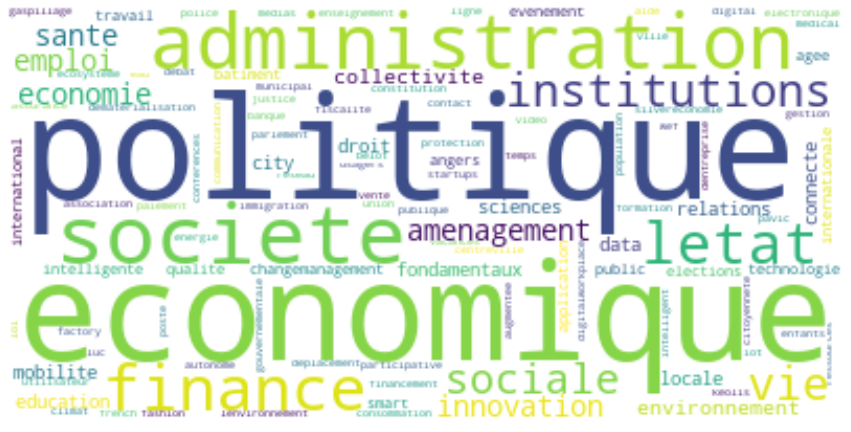

In [15]:
# Get my keywords list
Keywords, Wordcloud = Get_keywords('rh', 
                                  Pick_weight_w, 
                                  Model, 30, 10)

# Write dimensions plot
Fig = plt.figure(figsize = (15, 15))

# Show my wordcloud plot
plt.imshow(Wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

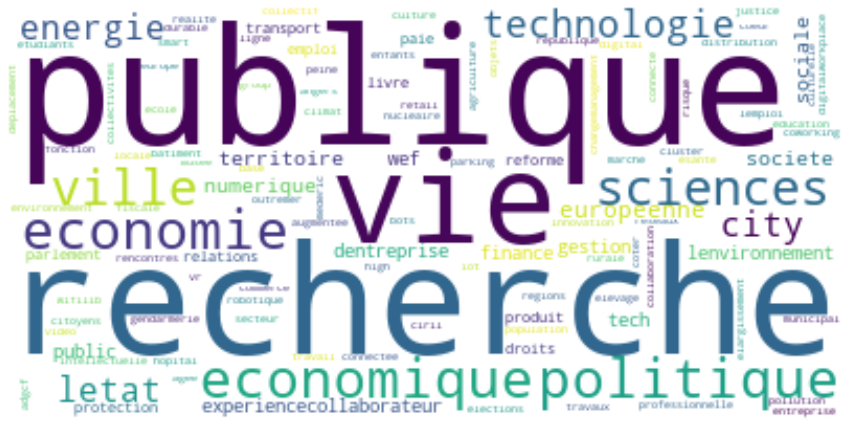

In [16]:
# Get my keywords list
Keywords, Wordcloud = Get_keywords('administration', 
                                  Pick_weight_w, 
                                  Model, 30, 10)
# Write dimensions plot
Fig = plt.figure(figsize = (15, 15))

# Show my wordcloud plot
plt.imshow(Wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

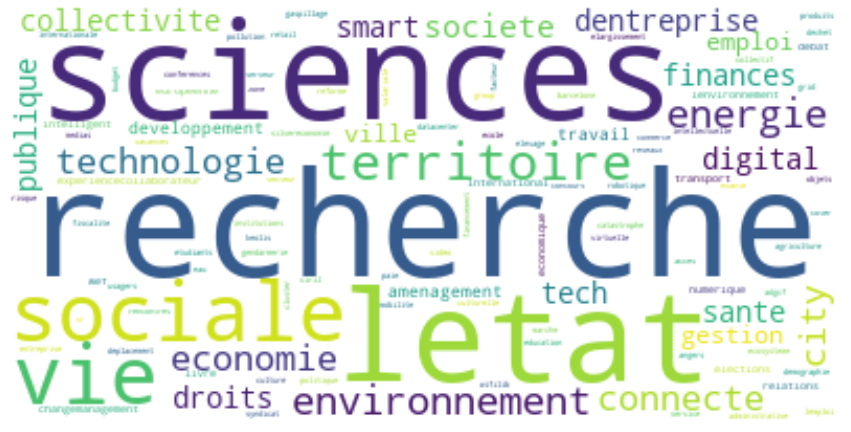

In [17]:
# Get my keywords list
Keywords, Wordcloud = Get_keywords('informatique', 
                                  Pick_weight_w, 
                                  Model, 30, 10)

# Write dimensions plot
Fig = plt.figure(figsize = (15, 15))

# Show my wordcloud plot
plt.imshow(Wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()